In [1]:
import os
import keras
from keras.applications import inception_v3 as inc_net
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions
#from keras.utils import CustomObjectScope
from keras.initializers import glorot_uniform
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.io import imread
import numpy as np
import lime
from lime import lime_image


In [2]:
import numpy as np
import os
import tensorflow as tf
import pandas as pd
from keras import models, optimizers, backend
from keras.layers import core, convolutional, pooling
from sklearn import model_selection
#from preprocess.imageSteeringDB import ImageSteeringDB
import cv2
import random

from tensorflow.keras.utils import Sequence
import matplotlib.image as mpimg

from PIL import Image
import skimage 
from skimage.transform import resize

from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from sklearn.preprocessing import LabelEncoder


from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions
from skimage.io import imread
from lime import lime_image

from keras.applications import inception_v3 as inc_net
from keras.applications.imagenet_utils import decode_predictions
from skimage.segmentation import mark_boundaries





In [3]:
image_dataset = r'C:/Users/Ketan/Thesis/PilotNet/src/driving_dataset_1'

In [4]:
# inet_model = inc_net.InceptionV3()

In [13]:
explainer = lime_image.LimeImageExplainer()

with tf.keras.utils.custom_object_scope({'GlorotUniform': glorot_uniform()}):
    model = keras.models.load_model('custom_classification_acc66_v1.h5')
#     model1 = keras.models.load_model('model_full.h5')
#     model2 = keras.models.load_model('PilotnetKeras_Resized.h5')

In [14]:
def transform_img_fn(path_list):
    out = []
    for img_path in path_list:
        img = image.load_img(img_path)#, target_size=(256,455))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = inc_net.preprocess_input(x)
        out.append(x)
    return np.vstack(out) /2 +0.5

In [15]:
# images = transform_img_fn([os.path.join(image_dataset)])


In [58]:
# images = transform_img_fn([os.path.join(r'C:/Users/Ketan/Thesis/PilotNet/src/driving_dataset/','13456.jpg')])
# I'm dividing by 2 and adding 0.5 because of how this Inception represents images
#plt.imshow(images[0] )/ 2 + 0.5
# plt.imshow((images[0] * 255).astype(np.uint8))

# preds = model2.predict(images)
# for x in decode_predictions(preds)[0]:
#     print(x)


In [38]:
image_paths = []
for _, _, files in os.walk(image_dataset):
    for file in files:
        image_paths.append(os.path.join(image_dataset, file))

images = transform_img_fn(image_paths)
len(image_paths) 


15

In [41]:
images.shape

(15, 256, 455, 3)

In [42]:
model.predict(images)

array([[6.22113142e-03, 1.07346592e-03, 1.82607248e-02, 9.86047387e-02,
        1.80626605e-02, 3.76170501e-02, 1.24251753e-01, 1.40543148e-01,
        8.98496360e-02, 4.65515703e-01],
       [2.13785982e-03, 3.08621849e-04, 8.57805181e-03, 7.36597180e-02,
        1.18347900e-02, 3.67997177e-02, 1.35077327e-01, 9.99055132e-02,
        1.05754010e-01, 5.25944412e-01],
       [4.28156666e-02, 9.14373342e-03, 8.82917494e-02, 3.47623259e-01,
        3.80543359e-02, 5.46622351e-02, 1.06856443e-01, 6.99072331e-02,
        2.98914518e-02, 2.12753847e-01],
       [3.26436348e-02, 7.15205260e-03, 6.13600165e-02, 2.64230102e-01,
        3.89907733e-02, 6.08930811e-02, 1.35401890e-01, 8.51352140e-02,
        3.94247100e-02, 2.74768502e-01],
       [6.06432259e-02, 9.69136972e-03, 9.03708637e-02, 4.88196760e-01,
        2.10381299e-02, 2.79312767e-02, 6.20352998e-02, 4.13061939e-02,
        2.32452303e-02, 1.75541699e-01],
       [7.80415982e-02, 7.14186803e-02, 1.55426085e-01, 4.52673912e-01,
   

In [ ]:
explanations = []
for image in images:
    explanations = explainer.explain_instance(image.astype('double'), model.predict, num_samples=1000)


In [61]:
explanations

In [44]:
# explanations = explainer.explain_instance(images[5].astype('double'), model.predict, num_samples=1000)


  0%|          | 0/1000 [00:00<?, ?it/s]

In [45]:
# temp, mask = explanations.get_image_and_mask(explanations.top_labels[0], positive_only=True, num_features=5, hide_rest=False)


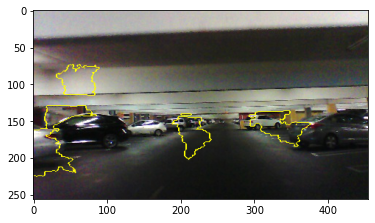

In [46]:
plt.imshow(mark_boundaries(temp , mask))


In [47]:
temp, mask = explanations.get_image_and_mask(explanations.top_labels[0], positive_only=True, num_features=5, hide_rest=False)


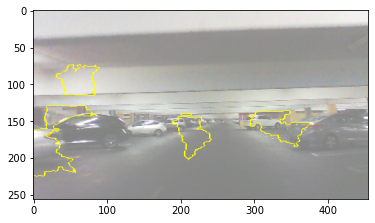

In [48]:
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))


In [66]:
from skimage.segmentation import mark_boundaries

plt.figure(1, plt.figure(figsize=(100,100)))
index = 0
for explanation in explanations:
    temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
    plt.subplot(20, 20, 1 + index)
    plt.imshow(mark_boundaries(temp, mask))
    index = index + 1
plt.show()

TypeError: 'ImageExplanation' object is not iterable

<Figure size 7200x7200 with 0 Axes>